# **Aerofit Case Study:**

**About Aerofit:**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Product Purchased:**	KP281, KP481, or KP781

**Age:**	In years

**Gender:**	Male/Female

**Education:**	In years

**MaritalStatus:**	Single or partnered

**Usage:**	The average number of times the customer plans to use the treadmill each week

**Income:**	Annual income (in $)

**Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

# **Data Analysis:**

In [206]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [207]:
# Read the Aerofit dataset and create a dataframe for analysis. Print the first 5 rows
df = pd.read_csv("aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [208]:
# Print the last 5 rows
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [209]:
# Print the shape of the dataframe
df.shape

(180, 9)

In [210]:
# Statistical summary of the numerical columns of the dataframe
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [211]:
# Data type of the attributes of the dataframe
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [212]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [213]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [214]:
df.keys()

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [215]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


### **1. There are three unique products out of which KP281 is the most frequent one.**

### **2. There are two gender values, Male and Female. There are 2 marital statuses, Single and Partnered. Minimum age is 18, maximum age is 50, mean age is 28.79 and 75% of persons have age less than or equal to 33.**

### **3. Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.**

In [216]:
# Check for missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a dataFrame for better readability
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df

,Missing Values,Percentage (%)
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0


# **The dataset is clean with no missing values!**

# **Product Portfolio:**

In [217]:
# The KP281 is an entry-level treadmill that sells for $1,500.
# The KP481 is for mid-level runners that sell for $1,750.
# The KP781 treadmill is having advanced features that sell for $2,500.

pdt_df  = df['Product'].value_counts().to_frame().reset_index().rename(columns = {'count':'Products sold'})
pdt_df['Revenue'] = pd.Series(np.array([80*1500, 60*1750, 40*2500]))
pdt_df

,Product,Products sold,Revenue
0,KP281,80,120000
1,KP481,60,105000
2,KP781,40,100000


# **KP281 is the highest sold treadmill with 120,000 in revenue and KP781 is the least sold treadmill with 100,000 in revenue.**

# **Non-Graphical Analysis:**

In [218]:
print("Unique products: ", df['Product'].unique())
df['Product'].value_counts()

Unique products:  ['KP281' 'KP481' 'KP781']


,count
Product,
KP281,80
KP481,60
KP781,40


In [219]:
print("Unique gender values: ", df['Gender'].unique())
df['Gender'].value_counts()

Unique gender values:  ['Male' 'Female']


,count
Gender,
Male,104
Female,76


In [220]:
print("Unique marital status: ", df['MaritalStatus'].unique())
df['MaritalStatus'].value_counts()

Unique marital status:  ['Single' 'Partnered']


,count
MaritalStatus,
Partnered,107
Single,73


In [221]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [222]:
print('Min Age: ', df['Age'].min())
print('Max Age: ', df['Age'].max())

print('Min Income: ', df['Income'].min())
print('Max Income: ', df['Income'].max())

print('Min Miles: ', df['Miles'].min())
print('Max Miles: ', df['Miles'].max())

Min Age:  18
Max Age:  50
Min Income:  29562
Max Income:  104581
Min Miles:  21
Max Miles:  360


In [223]:
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [224]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [225]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [226]:
# Categorize age, miles and income into their respective groups
# Age
bins_age = [17, 25, 35, 45, 150]
labels_age = ['18-25', '26-35', '36-45', '>45']
df['Age_group'] = pd.cut(df['Age'], bins = bins_age, labels = labels_age)

# Miles
bins_miles = [0, 100, 200, 300, 1000]
labels_miles = ['0-100', '101-200', '201-300', '>300']
df['Miles_group'] = pd.cut(df['Miles'], bins = bins_miles, labels = labels_miles)

# Income
bins_income = [29000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]
labels_income = ['20k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '>100000']
df['Income_group'] = pd.cut(df['Income'], bins = bins_income, labels = labels_income)

df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Miles_group,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,18-25,101-200,20k-40k
1,KP281,19,Male,15,Single,2,3,31836,75,18-25,0-100,20k-40k
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25,0-100,20k-40k
3,KP281,19,Male,12,Single,3,3,32973,85,18-25,0-100,20k-40k
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25,0-100,20k-40k
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,36-45,101-200,80k-90k
176,KP781,42,Male,18,Single,5,4,89641,200,36-45,101-200,80k-90k
177,KP781,45,Male,16,Single,5,5,90886,160,36-45,101-200,90k-100k
178,KP781,47,Male,18,Partnered,4,5,104581,120,>45,101-200,>100000


In [227]:
pd.crosstab(df["Product"], df["Age_group"],margins = True)

Age_group,18-25,26-35,36-45,>45,All
Product,,,,,
KP281,34,32,11,3,80
KP481,28,24,7,1,60
KP781,17,17,4,2,40
All,79,73,22,6,180


In [228]:
pd.crosstab(df["Product"], df["Income_group"],margins = True)

Income_group,20k-40k,40k-50k,50k-60k,60k-70k,70k-80k,80k-90k,90k-100k,>100000,All
Product,,,,,,,,,
KP281,23,25,26,6,0,0,0,0,80
KP481,9,21,23,7,0,0,0,0,60
KP781,0,5,6,6,4,7,9,3,40
All,32,51,55,19,4,7,9,3,180


In [229]:
pd.crosstab(df["Product"], df["Miles_group"],margins = True)

Miles_group,0-100,101-200,201-300,>300,All
Product,,,,,
KP281,62,18,0,0,80
KP481,44,15,1,0,60
KP781,8,27,4,1,40
All,114,60,5,1,180


# **Univariate and Bivariate Analysis:**

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


Gender
Male      104
Female     76
Name: count, dtype: int64


MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64




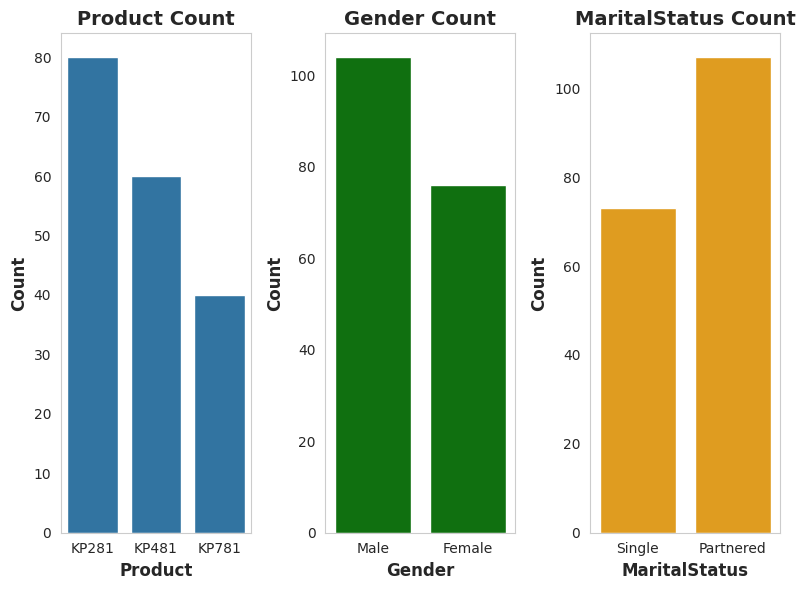

In [230]:
# Countplot of Product, Gender and MaritalStatus columns

print(df['Product'].value_counts())
print("\n")
print(df['Gender'].value_counts())
print("\n")
print(df['MaritalStatus'].value_counts())
print("\n")

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (8, 6))
sns.countplot(data = df, x = 'Product', ax = axs[0])
axs[0].set_title("Product Count", fontsize = 14, fontweight = 'bold')
axs[0].set_xlabel("Product", fontsize = 12, fontweight = 'bold')
axs[0].set_ylabel("Count", fontsize = 12, fontweight = 'bold')
axs[0].grid(False)

sns.countplot(data = df, x = 'Gender', ax = axs[1], color = 'green')
axs[1].set_title("Gender Count", fontsize = 14, fontweight = 'bold')
axs[1].set_xlabel("Gender", fontsize = 12, fontweight = 'bold')
axs[1].set_ylabel("Count", fontsize = 12, fontweight = 'bold')
axs[1].grid(False)

sns.countplot(data = df, x = 'MaritalStatus', ax = axs[2], color = 'orange')
axs[2].set_title("MaritalStatus Count", fontsize = 14, fontweight = 'bold')
axs[2].set_xlabel("MaritalStatus", fontsize = 12, fontweight = 'bold')
axs[2].set_ylabel("Count", fontsize = 12, fontweight = 'bold')
axs[2].grid(False)

plt.tight_layout()
plt.show()

### **KP281 is the most frequent product. There are more Males in the data than Females and more partnered people than singles.**

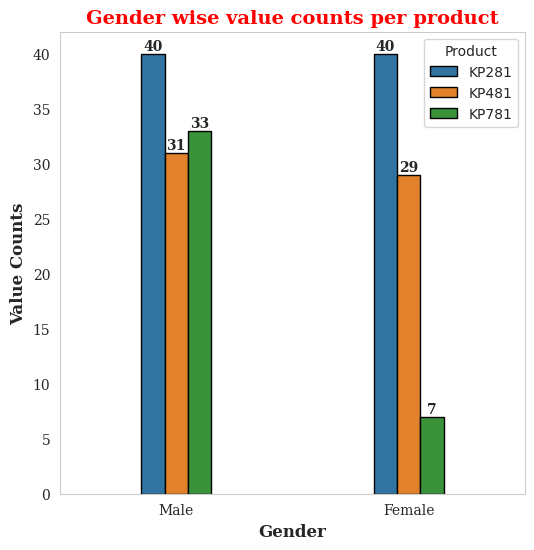

In [231]:
# Gender wise value counts per product

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
ax = sns.countplot(data = df, x = df['Gender'], hue = df['Product'], width = 0.3, edgecolor = 'black')

plt.title('Gender wise value counts per product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Gender', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Value Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

# Display values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 10, fontweight = 'bold', fontname = 'Serif')

# Setting x-ticks to the center of the bars
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels())

plt.xticks(fontsize = 10, fontname = 'Serif')
plt.yticks(fontsize = 10, fontname = 'Serif')
plt.grid(False)
plt.show()

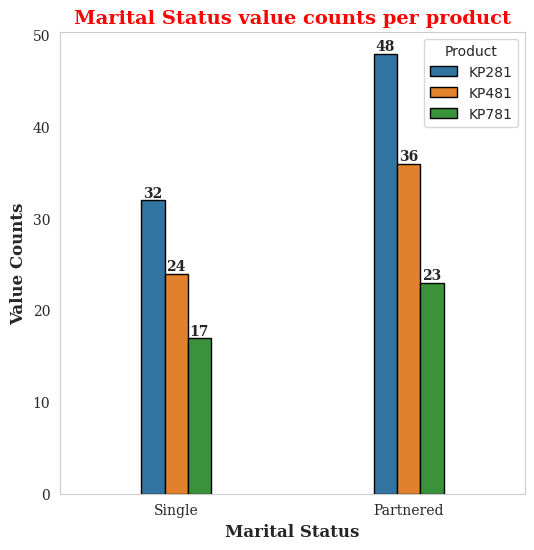

In [232]:
# Marital Status value counts per product

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
ax = sns.countplot(data = df, x = df['MaritalStatus'], hue = df['Product'], width = 0.3, edgecolor = 'black')

plt.title('Marital Status value counts per product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Marital Status', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Value Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

# Display values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 10, fontweight = 'bold', fontname = 'Serif')

# Setting x-ticks to the center of the bars
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels())

plt.xticks(fontsize = 10, fontname = 'Serif')
plt.yticks(fontsize = 10, fontname = 'Serif')
plt.grid(False)
plt.show()

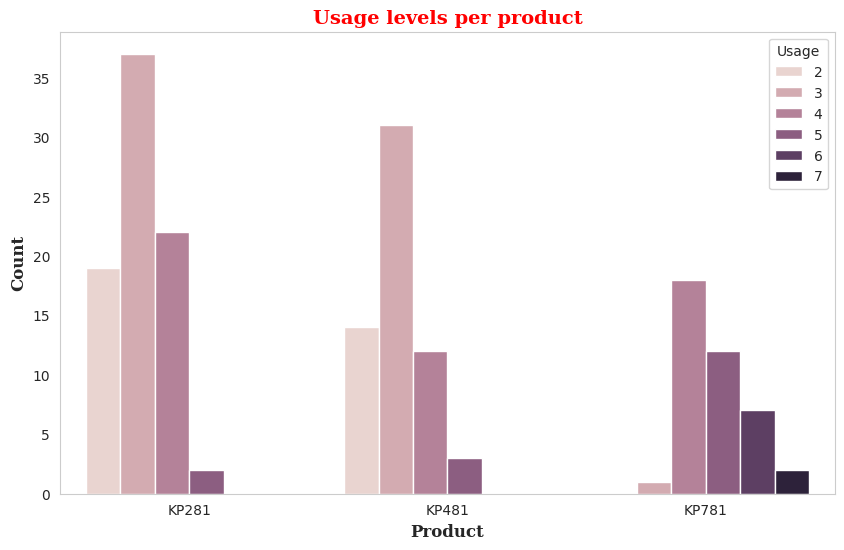

In [233]:
# Grouped countplot to visualize Usage levels per Product

sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Product', hue = 'Usage')
plt.title('Usage levels per product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Product', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

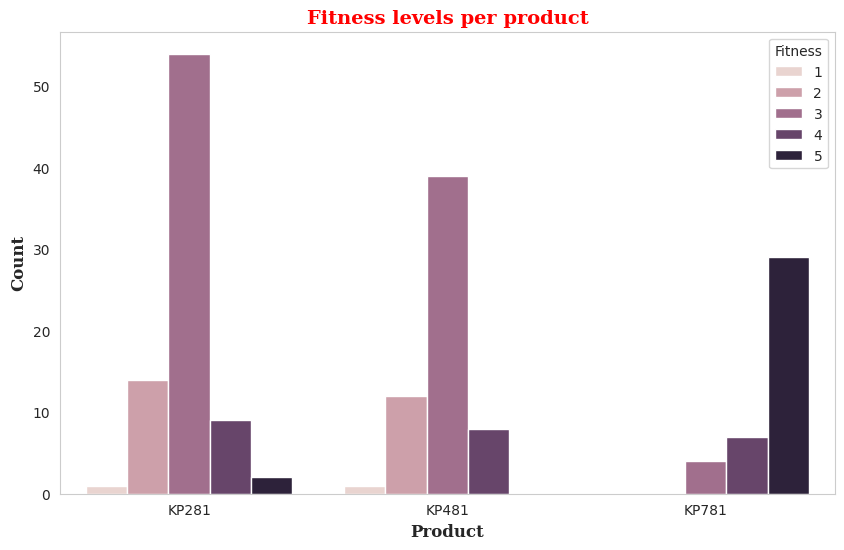

In [234]:
# Grouped countplot to visualize Fitness levels per Product

sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Product', hue = 'Fitness')
plt.title('Fitness levels per product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Product', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

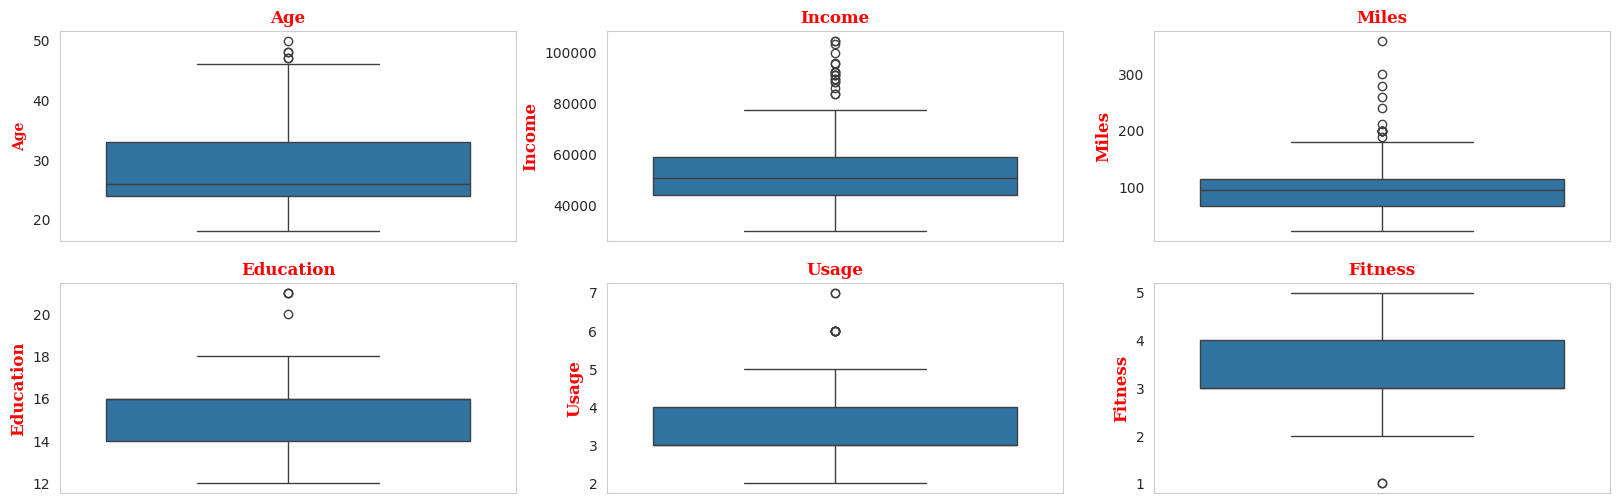

In [235]:
# Outlier Detection

plt.figure(figsize = (20,6))
sns.set_style("whitegrid")

plt.subplot(2,3,1)
sns.boxplot(data = df, y = 'Age')
plt.title('Age', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Age', fontsize = 10, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

plt.subplot(2,3,2)
sns.boxplot(data = df, y = 'Income')
plt.title('Income', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Income', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

plt.subplot(2,3,3)
sns.boxplot(data = df, y = 'Miles')
plt.title('Miles', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Miles', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

plt.subplot(2,3,4)
sns.boxplot(data = df, y = 'Education')
plt.title('Education', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Education', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

plt.subplot(2,3,5)
sns.boxplot(data = df, y = 'Usage')
plt.title('Usage', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Usage', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

plt.subplot(2,3,6)
sns.boxplot(data = df, y = 'Fitness')
plt.title('Fitness', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.ylabel('Fitness', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)

plt.show()

### **1. Age, Education, Fitness and Usage have a very few outliers while Income and Miles have more outliers.**

### **2. Majority custoemrs claim to use the treadmill between 3 and 4 times a week and have fitness between levels 3 and 4.**

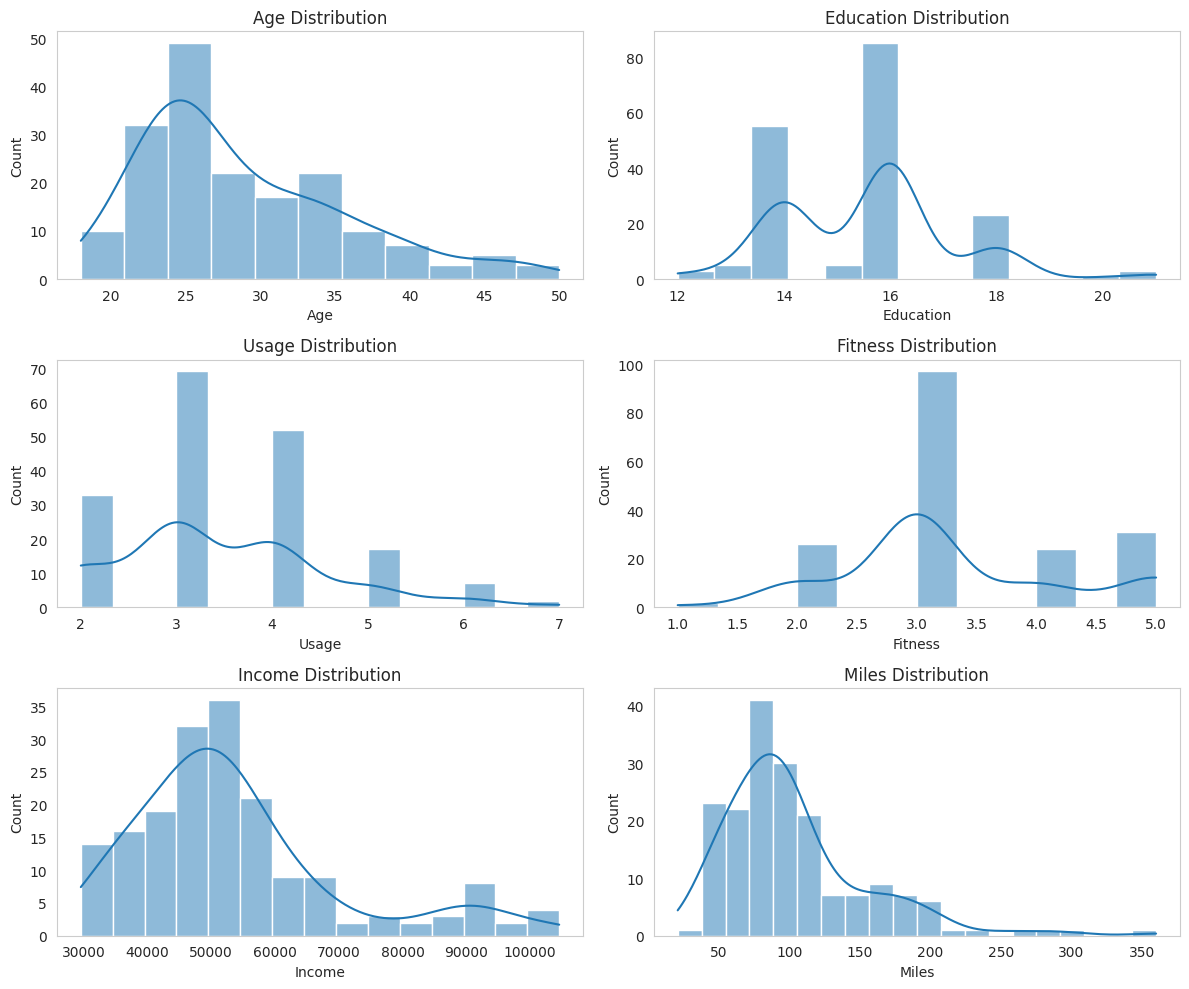

In [236]:
# Distribution of numerical columns

fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))

sns.histplot(data = df, x = "Age", kde = True, ax = axis[0,0])
axis[0, 0].set_title("Age Distribution")
axis[0, 0].grid(False)

sns.histplot(data = df, x = "Education", kde = True, ax = axis[0,1])
axis[0, 1].set_title("Education Distribution")
axis[0, 1].grid(False)

sns.histplot(data = df, x = "Usage", kde = True, ax = axis[1,0])
axis[1, 0].set_title("Usage Distribution")
axis[1, 0].grid(False)

sns.histplot(data = df, x = "Fitness", kde = True, ax = axis[1,1])
axis[1, 1].set_title("Fitness Distribution")
axis[1, 1].grid(False)

sns.histplot(data = df, x = "Income", kde = True, ax = axis[2,0])
axis[2, 0].set_title("Income Distribution")
axis[2, 0].grid(False)

sns.histplot(data = df, x = "Miles", kde = True, ax = axis[2,1])
axis[2, 1].set_title("Miles Distribution")
axis[2, 1].grid(False)

plt.tight_layout()
plt.show()

### **Majority of data is from ages 20 to 35. have more records. Fitness levels of 3 and above are more prominent to purchase a treadmill and those with an income between 30k to 70k. A consistent decrease in the number of miles run per week is observed.**

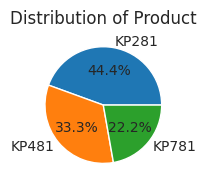

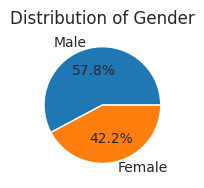

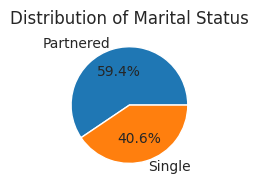

In [237]:
# Distribution of Product, Gender and MaritalStatus

sns.set_style("whitegrid")

plt.subplot(1,3,1)
plt.pie(df['Product'].value_counts(), labels = df['Product'].value_counts().index, autopct = '%1.1f%%')
plt.title('Distribution of Product')
plt.show()

plt.subplot(1,3,2)
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, autopct = '%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

plt.subplot(1,3,3)
plt.pie(df['MaritalStatus'].value_counts(), labels = df['MaritalStatus'].value_counts().index, autopct = '%1.1f%%')
plt.title('Distribution of Marital Status')
plt.show()

### **Product:**
44.44% of the customers have purchased KP2821 treadmill.

33.33% of the customers have purchased KP481 treadmill.

22.22% of the customers have purchased KP781 treadmill.

### **Gender:**
57.78% of the customers are Male.

42.2% of the customers are Female.

### **MaritalStatus:**
59.44% of the customers are Partnered.

40.6% of the customers are Singles.

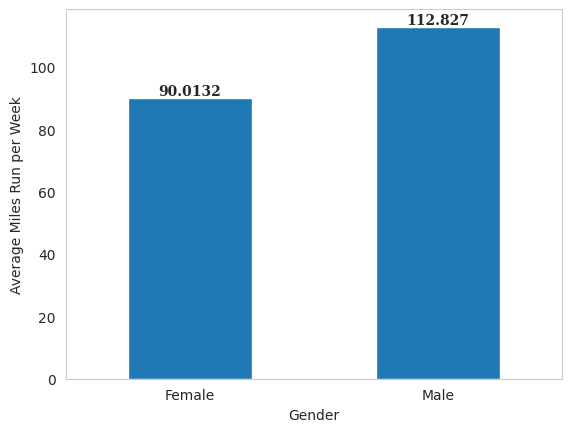

In [238]:
# Groupby gender and determine the average miles run per week
gender_data = df.groupby('Gender')['Miles'].mean()

# Bar graph to visualize the average miles run per week per gender
ax = gender_data.plot(kind = 'bar', xlabel = 'Gender', ylabel = 'Average Miles Run per Week')

# Display values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 10, fontweight = 'bold', fontname = 'Serif')

plt.xticks(rotation=0)
plt.grid(False)
plt.show()

### **Average miles run per week is higher in males(approx 112 miles) than females (approx 90 miles).**

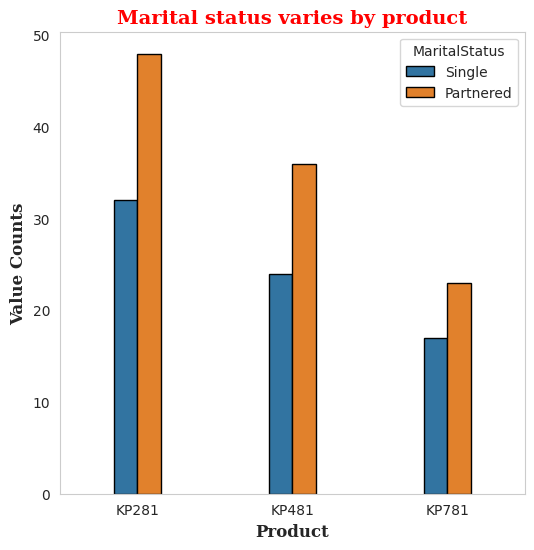

In [239]:
# Countplot to see the distribution of products across marital statuses

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
ax = sns.countplot(data = df, x = df['Product'], hue = df['MaritalStatus'], width = 0.3, edgecolor = 'black')

plt.title('Marital status varies by product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Product', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Value Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

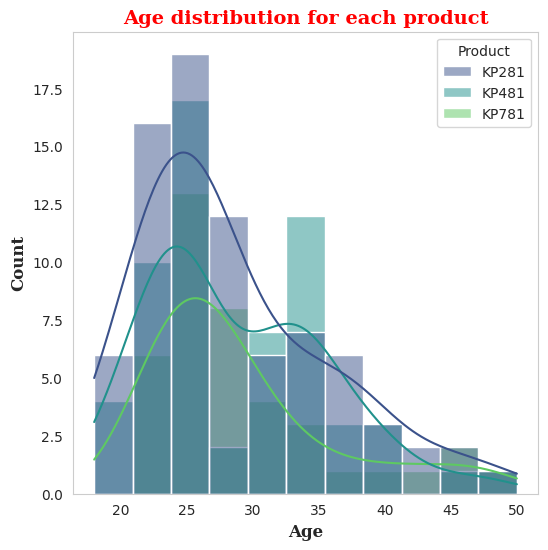

In [240]:
# Histplot to visualize the age distribution for each product

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
sns.histplot(data = df, x = 'Age', hue = 'Product', kde = True, palette = 'viridis')

plt.title('Age distribution for each product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Age', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

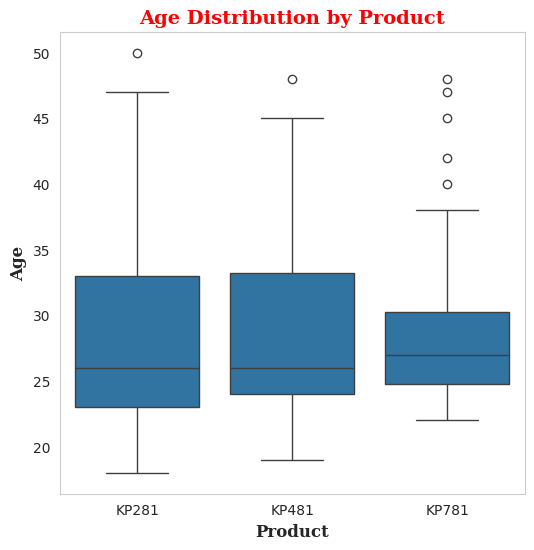

In [241]:
# Boxplot to compare the age distributions across products and identify outliers

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
sns.boxplot(data = df, x = 'Product', y = 'Age')
plt.title('Age Distribution by Product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Product', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Age', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

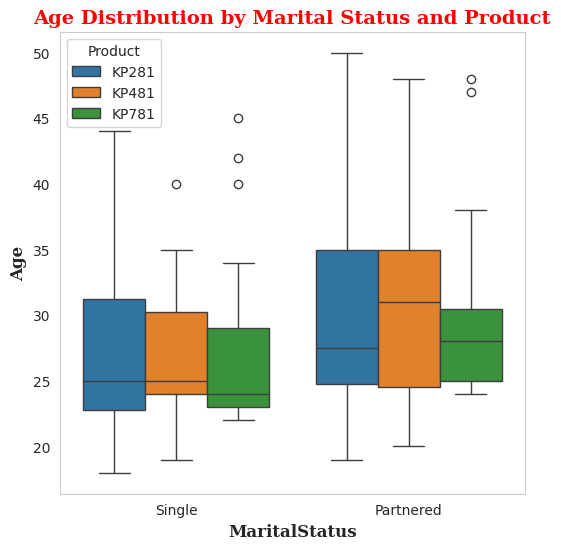

In [242]:
# Boxplot to see how age varies by marital status and product

sns.set_style("whitegrid")
plt.figure(figsize = (6,6))
sns.boxplot(data = df, x = 'MaritalStatus', y = 'Age', hue = 'Product')
plt.title('Age Distribution by Marital Status and Product', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('MaritalStatus', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Age', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

In [243]:
# Distribution of age and mark the majority values

upper_bound = np.quantile(df['Age'], 0.75)
lower_bound = np.quantile(df['Age'], 0.10)
fig = go.Figure(data=[go.Histogram(x = df['Age'])])
fig.update_layout(
    title_text=f'Distribution of Age with majority values between {int(lower_bound)} and {int(upper_bound)} years',
    xaxis_title_text='Age of the customer',
    yaxis_title_text='Count',
)
fig.add_vline(x=lower_bound, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=upper_bound, line_width=3, line_dash="dash", line_color="green")
fig.show()

<Figure size 1000x600 with 0 Axes>

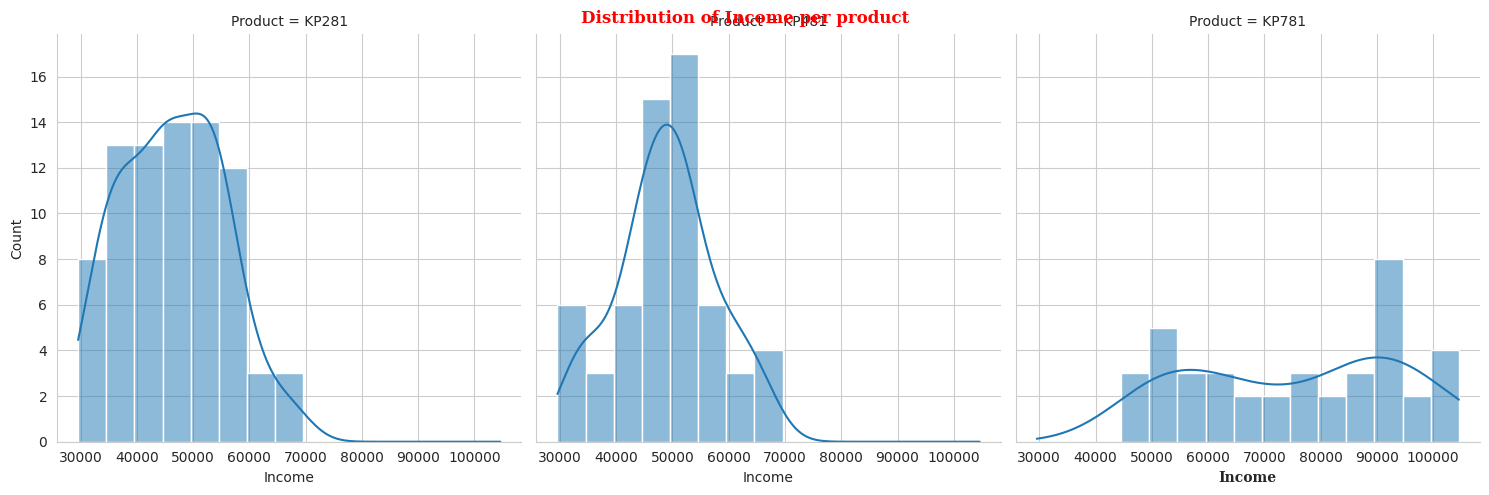

In [244]:
# Displot for income per product

plt.figure(figsize = (10,6))
sns.displot(data = df, x = 'Income', col = 'Product', kde = True)
plt.suptitle('Distribution of Income per product', fontsize = 12, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Income', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Count', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.show()

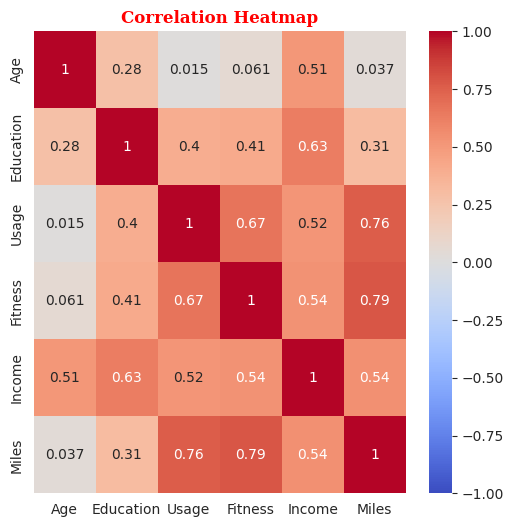

In [245]:
# Correlation heatmap

plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold', fontname='Serif', color='red')
plt.show()

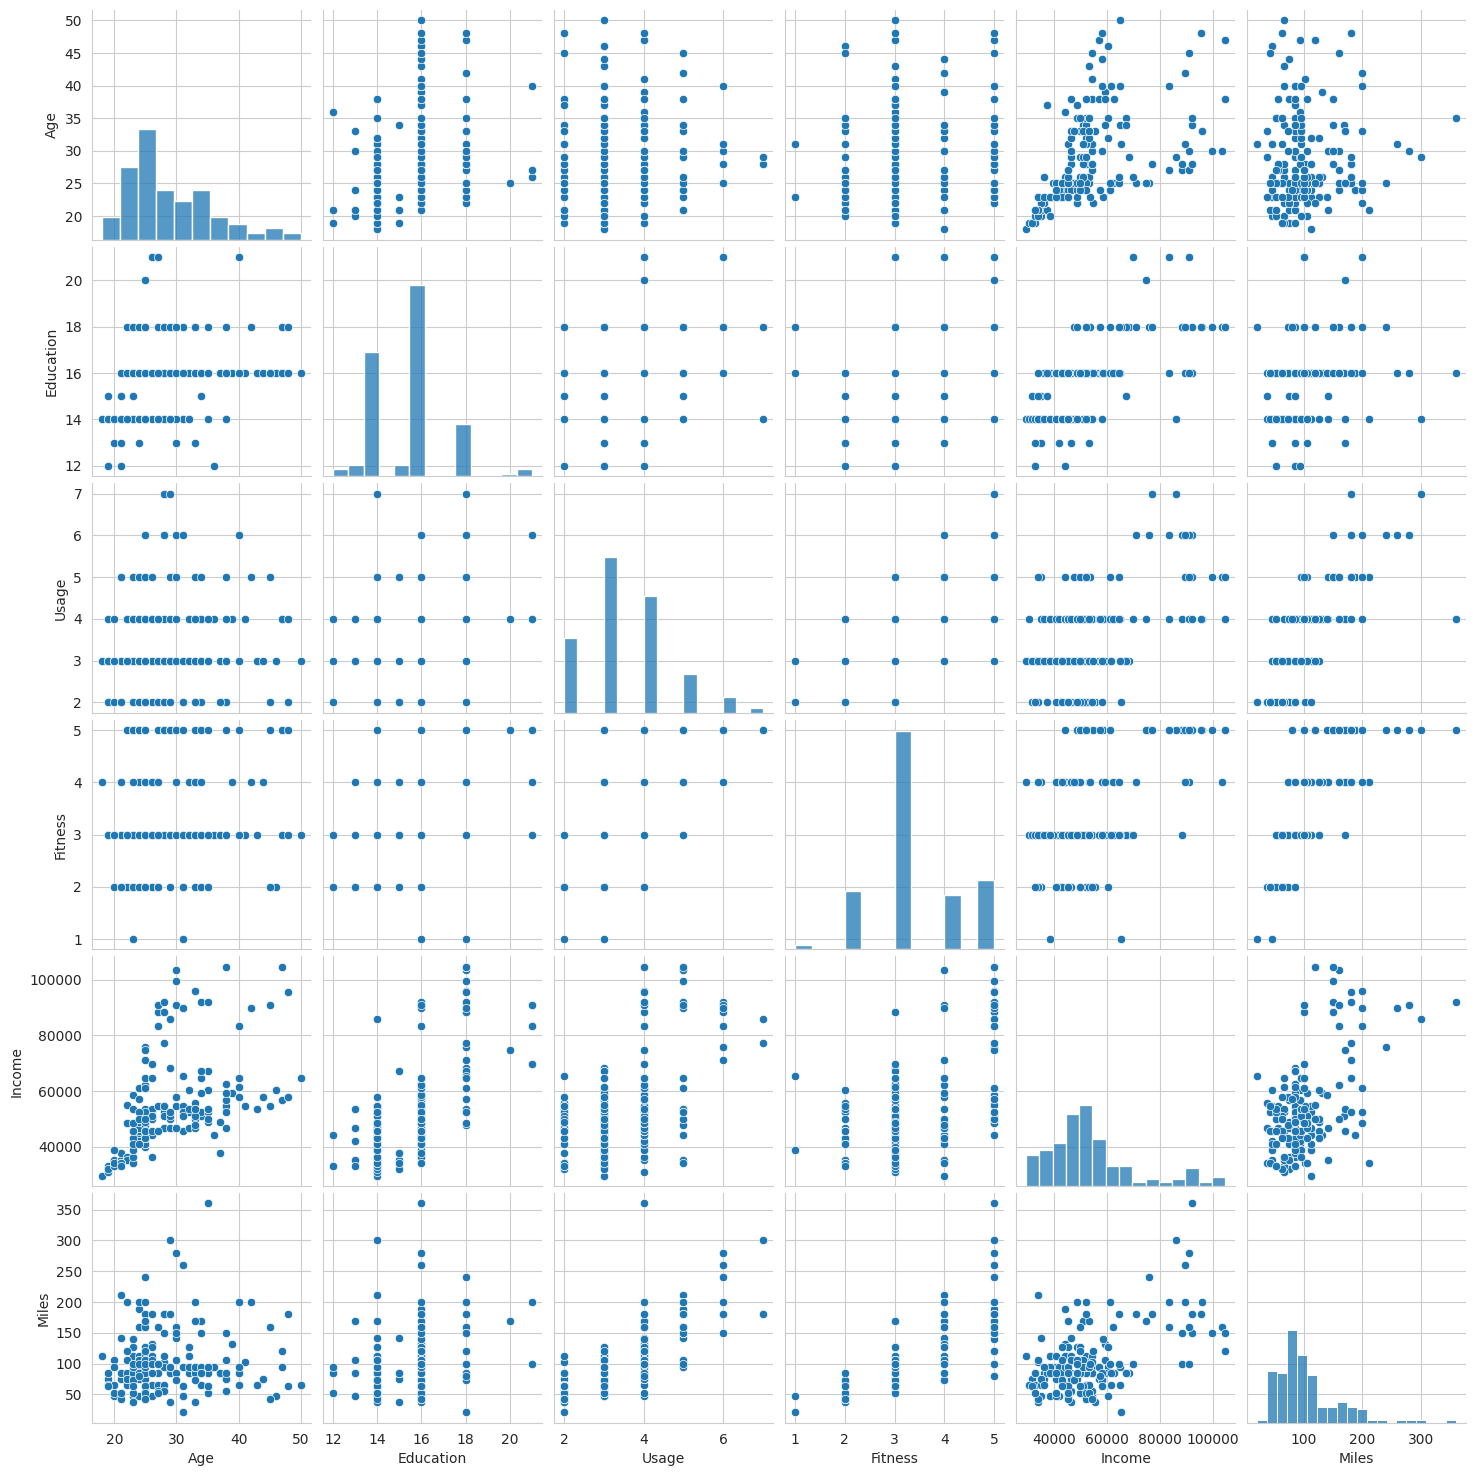

In [246]:
sns.pairplot(df)

# **Customer Profiling:**

In [247]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Miles_group,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,18-25,101-200,20k-40k
1,KP281,19,Male,15,Single,2,3,31836,75,18-25,0-100,20k-40k
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25,0-100,20k-40k
3,KP281,19,Male,12,Single,3,3,32973,85,18-25,0-100,20k-40k
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25,0-100,20k-40k
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,36-45,101-200,80k-90k
176,KP781,42,Male,18,Single,5,4,89641,200,36-45,101-200,80k-90k
177,KP781,45,Male,16,Single,5,5,90886,160,36-45,101-200,90k-100k
178,KP781,47,Male,18,Partnered,4,5,104581,120,>45,101-200,>100000


In [248]:
# Groupby multiple categories to profile the customers
cust_profile = df.groupby(['Gender', 'MaritalStatus', 'Age_group', 'Income_group', 'Product']).agg({
    'Usage': 'mean',
    'Fitness': 'mean',
    'Miles': 'mean'
}).reset_index()

cust_profile

,Gender,MaritalStatus,Age_group,Income_group,Product,Usage,Fitness,Miles
0,Female,Partnered,18-25,20k-40k,KP281,2.857143,2.714286,68.714286
1,Female,Partnered,18-25,20k-40k,KP481,4.000000,3.500000,159.000000
2,Female,Partnered,18-25,20k-40k,KP781,NaN,NaN,NaN
3,Female,Partnered,18-25,40k-50k,KP281,3.333333,3.333333,103.333333
4,Female,Partnered,18-25,40k-50k,KP481,3.333333,2.666667,88.333333
...,...,...,...,...,...,...,...,...
379,Male,Single,>45,90k-100k,KP481,NaN,NaN,NaN
380,Male,Single,>45,90k-100k,KP781,NaN,NaN,NaN
381,Male,Single,>45,>100000,KP281,NaN,NaN,NaN
382,Male,Single,>45,>100000,KP481,NaN,NaN,NaN


# **Marginal and Conditional Probabilities:**

In [249]:
pd.crosstab(df['Product'], df['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [250]:
pd.crosstab(df['Product'], df['Gender'], normalize = 'all')

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


In [251]:
pd.crosstab(df['Product'], [df['MaritalStatus'], df['Gender']], margins = True)

MaritalStatus Partnered      Single       All
Gender           Female Male Female Male     
Product                                      
KP281                27   21     13   19   80
KP481                15   21     14   10   60
KP781                 4   19      3   14   40
All                  46   61     30   43  180

In [252]:
pd.crosstab(df['Usage'], [df['Fitness'], df['Product']], margins = True)

Fitness     1           2           3                 4                 5  \
Product KP281 KP481 KP281 KP481 KP281 KP481 KP781 KP281 KP481 KP781 KP281   
Usage                                                                       
2           0     1     9     5    10     8     0     0     0     0     0   
3           1     0     4     6    27    20     0     5     5     0     0   
4           0     0     1     1    17     9     4     3     2     2     1   
5           0     0     0     0     0     2     0     1     1     4     1   
6           0     0     0     0     0     0     0     0     0     1     0   
7           0     0     0     0     0     0     0     0     0     0     0   
All         1     1    14    12    54    39     4     9     8     7     2   

Fitness        All  
Product KP781       
Usage               
2           0   33  
3           1   69  
4          12   52  
5           8   17  
6           6    7  
7           2    2  
All        29  180

In [253]:
pd.crosstab(df['Education'], df['Fitness'], margins = True)

Fitness,1,2,3,4,5,All
Education,,,,,,
12,0,1,2,0,0,3
13,0,2,2,1,0,5
14,0,11,35,8,1,55
15,0,1,3,1,0,5
16,1,11,50,8,15,85
18,1,0,4,5,13,23
20,0,0,0,0,1,1
21,0,0,1,1,1,3
All,2,26,97,24,31,180


In [254]:
pd.crosstab(df['Education'], df['Usage'], margins = True)

Usage,2,3,4,5,6,7,All
Education,,,,,,,
12,1,1,1,0,0,0,3
13,0,2,3,0,0,0,5
14,15,28,9,2,0,1,55
15,3,1,0,1,0,0,5
16,13,34,29,7,2,0,85
18,1,3,7,7,4,1,23
20,0,0,1,0,0,0,1
21,0,0,2,0,1,0,3
All,33,69,52,17,7,2,180


In [255]:
pd.crosstab(df['Gender'], df['Fitness'], margins = True)

Fitness,1,2,3,4,5,All
Gender,,,,,,
Female,1,16,45,8,6,76
Male,1,10,52,16,25,104
All,2,26,97,24,31,180


In [256]:
df['Product'].value_counts(normalize = True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [257]:
df['Gender'].value_counts(normalize = True)

,proportion
Gender,
Male,0.577778
Female,0.422222


In [258]:
df['MaritalStatus'].value_counts(normalize = True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


In [259]:
# Probability of a male/female customer buying a treadmill

male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

kp281_male_customers = male_customers[male_customers['Product'] == 'KP281']
kp481_male_customers = male_customers[male_customers['Product'] == 'KP481']
kp781_male_customers = male_customers[male_customers['Product'] == 'KP781']
kp281_female_customers = female_customers[female_customers['Product'] == 'KP281']
kp481_female_customers = female_customers[female_customers['Product'] == 'KP481']
kp781_female_customers = female_customers[female_customers['Product'] == 'KP781']

p1 = len(kp281_male_customers) / len(male_customers)
p2 = len(kp481_male_customers) / len(male_customers)
p3 = len(kp781_male_customers) / len(male_customers)
p4 = len(kp281_female_customers) / len(female_customers)
p5 = len(kp481_female_customers) / len(female_customers)
p6 = len(kp781_female_customers) / len(female_customers)

print("The probability of a male customer buying a KP281 treadmill is:", p1)
print("The probability of a male customer buying a KP481 treadmill is:", p2)
print("The probability of a male customer buying a KP781 treadmill is:", p3)
print("\n")
print("The probability of a female customer buying a KP781 treadmill is:", p4)
print("The probability of a female customer buying a KP781 treadmill is:", p5)
print("The probability of a female customer buying a KP781 treadmill is:", p6)

The probability of a male customer buying a KP281 treadmill is: 0.38461538461538464
The probability of a male customer buying a KP481 treadmill is: 0.2980769230769231
The probability of a male customer buying a KP781 treadmill is: 0.3173076923076923


The probability of a female customer buying a KP781 treadmill is: 0.5263157894736842
The probability of a female customer buying a KP781 treadmill is: 0.3815789473684211
The probability of a female customer buying a KP781 treadmill is: 0.09210526315789473


In [260]:
# Probability of a single/partnered customer buying a treadmill

single_customers = df[df['MaritalStatus'] == 'Single']
partnered_customers = df[df['MaritalStatus'] == 'Partnered']

kp281_single_customers = single_customers[single_customers['Product'] == 'KP281']
kp481_single_customers = single_customers[single_customers['Product'] == 'KP481']
kp781_single_customers = single_customers[single_customers['Product'] == 'KP781']
kp281_partnered_customers = partnered_customers[partnered_customers['Product'] == 'KP281']
kp481_partnered_customers = partnered_customers[partnered_customers['Product'] == 'KP481']
kp781_partnered_customers = partnered_customers[partnered_customers['Product'] == 'KP781']

p1 = len(kp281_single_customers) / len(single_customers)
p2 = len(kp481_single_customers) / len(single_customers)
p3 = len(kp781_single_customers) / len(single_customers)
p4 = len(kp281_partnered_customers) / len(partnered_customers)
p5 = len(kp481_partnered_customers) / len(partnered_customers)
p6 = len(kp781_partnered_customers) / len(partnered_customers)

print("The probability of a single customer buying a KP281 treadmill is:", p1)
print("The probability of a single customer buying a KP481 treadmill is:", p2)
print("The probability of a single customer buying a KP781 treadmill is:", p3)
print("\n")
print("The probability of a partnered customer buying a KP281 treadmill is:", p4)
print("The probability of a partnered customer buying a KP481 treadmill is:", p5)
print("The probability of a partnered customer buying a KP781 treadmill is:", p6)

The probability of a single customer buying a KP281 treadmill is: 0.4383561643835616
The probability of a single customer buying a KP481 treadmill is: 0.3287671232876712
The probability of a single customer buying a KP781 treadmill is: 0.2328767123287671


The probability of a partnered customer buying a KP281 treadmill is: 0.4485981308411215
The probability of a partnered customer buying a KP481 treadmill is: 0.3364485981308411
The probability of a partnered customer buying a KP781 treadmill is: 0.21495327102803738


In [261]:
# Conditional Probability (P(Product | Gender))
conditional_prob_table = pd.crosstab(df['Product'], df['Gender'], normalize = 'columns') * 100

conditional_prob_table.index.name = None
conditional_prob_table

Gender,Female,Male
KP281,52.631579,38.461538
KP481,38.157895,29.807692
KP781,9.210526,31.730769


In [262]:
# Conditional Probability (P(Product | MaritalStatus))
conditional_prob_table = pd.crosstab(df['Product'], df['MaritalStatus'], normalize = 'columns') * 100

conditional_prob_table.index.name = None
conditional_prob_table

MaritalStatus,Partnered,Single
KP281,44.859813,43.835616
KP481,33.644860,32.876712
KP781,21.495327,23.287671


In [263]:
# P(KP281 | Male), P(KP481 | Male), P(KP781 | Male), P(KP281 | Female), P(KP481 | Female), P(KP781 | Female)
male_kp281 = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP281')].shape[0]
male_kp481 = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP481')].shape[0]
male_kp781 = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')].shape[0]

total_male = df[df['Gender'] == 'Male'].shape[0]

p_kp281_given_male = (male_kp281 / total_male) * 100
p_kp481_given_male = (male_kp481 / total_male) * 100
p_kp781_given_male = (male_kp781 / total_male) * 100

print(f"\nProbability of buying KP281 given Male: {p_kp281_given_male:.2f}%")
print(f"\nProbability of buying KP481 given Male: {p_kp481_given_male:.2f}%")
print(f"\nProbability of buying KP781 given Male: {p_kp781_given_male:.2f}%")

female_kp281 = df[(df['Gender'] == 'Female') & (df['Product'] == 'KP281')].shape[0]
female_kp481 = df[(df['Gender'] == 'Female') & (df['Product'] == 'KP481')].shape[0]
female_kp781 = df[(df['Gender'] == 'Female') & (df['Product'] == 'KP781')].shape[0]

total_female = df[df['Gender'] == 'Female'].shape[0]

p_kp281_given_female = (male_kp281 / total_female) * 100
p_kp481_given_female = (male_kp481 / total_female) * 100
p_kp781_given_female = (male_kp781 / total_female) * 100

print(f"\nProbability of buying KP281 given Female: {p_kp281_given_female:.2f}%")
print(f"\nProbability of buying KP481 given Female: {p_kp481_given_female:.2f}%")
print(f"\nProbability of buying KP781 given Female: {p_kp781_given_female:.2f}%")


Probability of buying KP281 given Male: 38.46%

Probability of buying KP481 given Male: 29.81%

Probability of buying KP781 given Male: 31.73%

Probability of buying KP281 given Female: 52.63%

Probability of buying KP481 given Female: 40.79%

Probability of buying KP781 given Female: 43.42%


In [264]:
# P(KP281 | Single), P(KP481 | Single), P(KP781 | Single), P(KP281 | Married), P(KP481 | Married), P(KP781 | Married)
single_kp281 = df[(df['MaritalStatus'] == 'Single') & (df['Product'] == 'KP281')].shape[0]
single_kp481 = df[(df['MaritalStatus'] == 'Single') & (df['Product'] == 'KP481')].shape[0]
single_kp781 = df[(df['MaritalStatus'] == 'Single') & (df['Product'] == 'KP781')].shape[0]

total_single = df[df['MaritalStatus'] == 'Single'].shape[0]

p_kp281_given_single = (single_kp281 / total_single) * 100
p_kp481_given_single = (single_kp481 / total_single) * 100
p_kp781_given_single = (single_kp781 / total_single) * 100

print(f"\nProbability of buying KP281 given Single: {p_kp281_given_single:.2f}%")
print(f"\nProbability of buying KP481 given Single: {p_kp481_given_single:.2f}%")
print(f"\nProbability of buying KP781 given Single: {p_kp781_given_single:.2f}%")

partnered_kp281 = df[(df['MaritalStatus'] == 'Partnered') & (df['Product'] == 'KP281')].shape[0]
partnered_kp481 = df[(df['MaritalStatus'] == 'Partnered') & (df['Product'] == 'KP481')].shape[0]
partnered_kp781 = df[(df['MaritalStatus'] == 'Partnered') & (df['Product'] == 'KP781')].shape[0]

total_partnered = df[df['MaritalStatus'] == 'Partnered'].shape[0]

p_kp281_given_partnered = (partnered_kp281 / total_partnered) * 100
p_kp481_given_partnered = (partnered_kp481 / total_partnered) * 100
p_kp781_given_partnered = (partnered_kp781 / total_partnered) * 100

print(f"\nProbability of buying KP281 given Partnered: {p_kp281_given_partnered:.2f}%")
print(f"\nProbability of buying KP481 given Partnered: {p_kp481_given_partnered:.2f}%")
print(f"\nProbability of buying KP781 given Partnered: {p_kp781_given_partnered:.2f}%")


Probability of buying KP281 given Single: 43.84%

Probability of buying KP481 given Single: 32.88%

Probability of buying KP781 given Single: 23.29%

Probability of buying KP281 given Partnered: 44.86%

Probability of buying KP481 given Partnered: 33.64%

Probability of buying KP781 given Partnered: 21.50%


# **Insights and Recommendations:**

# **Insights:**

1. Product KP281 brings in the highest revenue followed by KP481 and KP781.

2. Majority of the customers are in the age group of 22-33 years with a 60-40 distribution of the male and female customers.

3. Majority of the customers spend 14, 16, 18 years on their education.

4. Most of the customers use the treadmill 3-4 times a week with a fitness level of 3-4. Majority of the customers earn between 30k and 70k.

5. Majority of the customers set a target of 50-135 miles.

6. The product KP781 is prefered by high-income earning individuals, their fitness levels are generally on high scale, the number of target miles they set are also higher.

# **Probabilities based on the data:**

**Note: Further analysis can be done on factors such as P(Product|Usage) and so on for an enhanced and deeper understanding on customer behaviour.**

Probability of buying KP281 given Male: 38.46%

Probability of buying KP481 given Male: 29.81%

Probability of buying KP781 given Male: 31.73%

Probability of buying KP281 given Female: 52.63%

Probability of buying KP481 given Female: 40.79%

Probability of buying KP781 given Female: 43.42%

Probability of buying KP281 given Single: 43.84%

Probability of buying KP481 given Single: 32.88%

Probability of buying KP781 given Single: 23.29%

Probability of buying KP281 given Partnered: 44.86%

Probability of buying KP481 given Partnered: 33.64%

Probability of buying KP781 given Partnered: 21.50%

# **Recommendations:**

1. A premium product for highly-educated, high income and active customers to increase the revenue.

2. Marketing to promote more products for females.

3. Since KP281 and KP481 also brings in significant revenue and is prefered by young & learnings individuals, added features and specialized discounts could help boost sales.